In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected= True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, classification_report
from imblearn.over_sampling import SMOTE
import xgboost

In [2]:
attrition= pd.read_csv("D:/machine learning casestudies/IBM-HR-Employee-attrition-master/WA_Fn-UseC_-HR-Employee-Attrition.csv")
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The data consists of levels for some features, The levels are as mentioned below:

Education                      1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction        1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement                 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction                1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating              1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction       1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance                1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In this data we can observe the target variable is attrition and the remaining are features

# Exploratory Data Analysis

In [3]:
#looking for NaN
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
attrition.apply(lambda x: sum(x.isnull()))

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


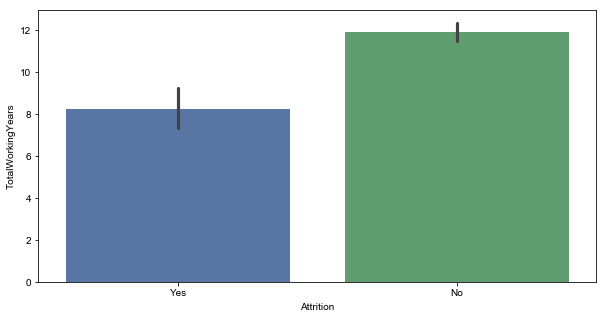

In [7]:
# distribution of the dataset
plt.subplots(1,1, figsize= (10,5))
sns.set(style="whitegrid")
ax = sns.barplot(x="Attrition", y="TotalWorkingYears", data=attrition)

In [8]:
attrition.groupby(['Attrition']).mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


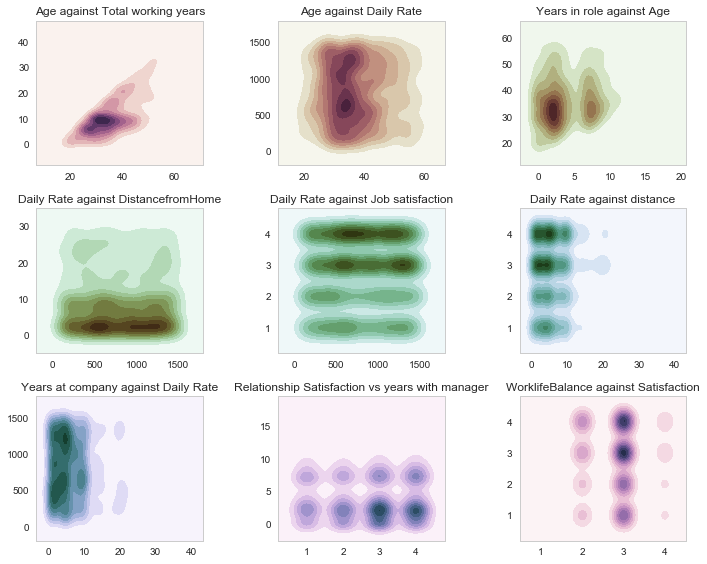

In [9]:
f, axes = plt.subplots(3, 3, figsize=(10, 8),
sharex=False, sharey=False)
# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')
cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')
cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')
cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')
cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')
cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')
cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')
cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')
cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')
f.tight_layout()

In [10]:
# convert label into numerical 
target_map= {'Yes': 1, 'No': 0}
attrition["Attrition_Numerical"]= attrition["Attrition"].apply(lambda x: target_map[x])

In [11]:
numerical= attrition.select_dtypes(exclude= 'object')
categorical= attrition.select_dtypes(include= 'object')

In [12]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

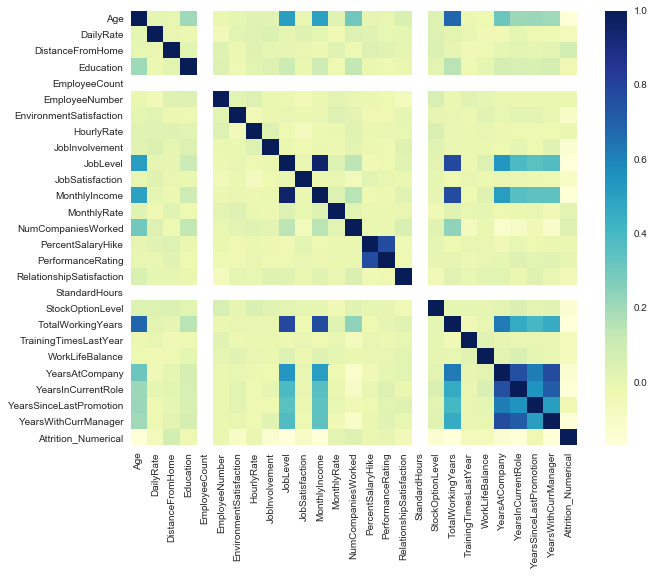

In [13]:
plt.figure(figsize= (10,8))
sns.heatmap(numerical.corr(), cmap= "YlGnBu")

In [14]:
categorical.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

we have to ignore features which are higly correlated

# Principal Component Analysis (PCA) technique:

In [15]:
# refining our list of numerical features
numerical= ['Age', 'DailyRate', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'WorkLifeBalance',
            'YearsAtCompany','Attrition_Numerical']

C:\Users\praveen330\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\praveen330\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



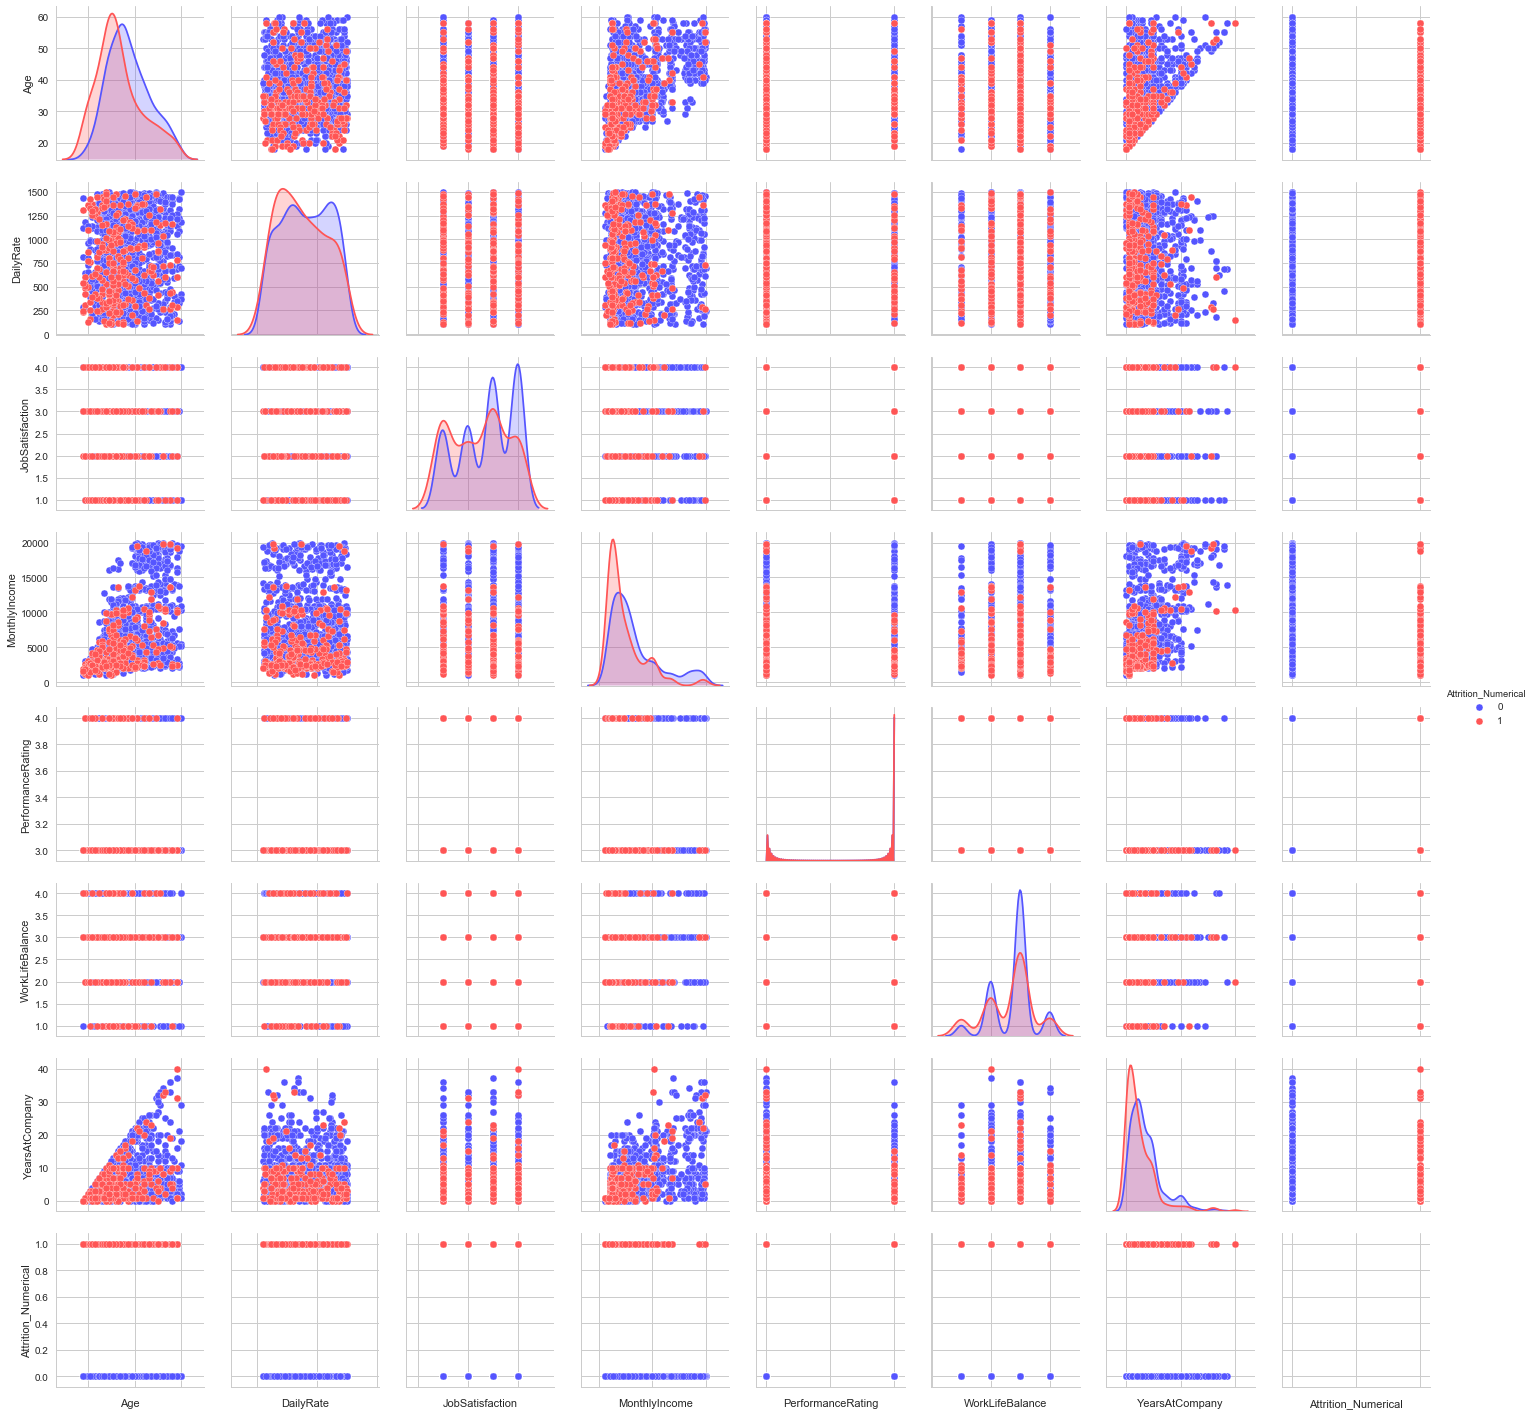

In [16]:
g= sns.pairplot(attrition[numerical], hue= 'Attrition_Numerical', palette= 'seismic', diag_kind='kde', diag_kws= dict(shade= True))
g.set(xticklabels= [])

# Feature Engineering and Categorical Encoding

In [17]:
# drop the Attrition_Numerical column from attrition dataset 
attrition= attrition.drop(['Attrition_Numerical'], axis= 1)

# empty list to store columns with categorical data and numerical data
numerical= attrition.select_dtypes(exclude= 'object')
categorical= attrition.select_dtypes(include= 'object')

In [18]:
categorical.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [19]:
attrition_cat= categorical.drop(['Attrition'], axis= 1)
attrition_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [20]:
attrition_cat= pd.get_dummies(attrition_cat)
attrition_cat.columns

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Over18_Y', 'OverTime_No', 'OverTime_Yes'],
      dtype='object')

In [21]:
attrition_cat.head(2)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0


creating new feature for Numerical data

In [22]:
#store the numerical features
attrition_num= numerical
attrition_num.head(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7


In [23]:
#concat the categorical and numerical data into single data
attrition_final= pd.concat([attrition_num, attrition_cat], axis= 1)
attrition_final.head(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0


In [24]:
#define a dictionary
target_map= {'Yes':1, 'No': 0}
target= attrition['Attrition'].apply(lambda x: target_map[x])
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

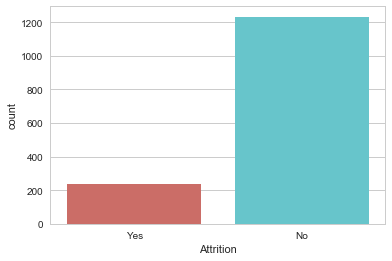

<Figure size 432x288 with 0 Axes>

In [25]:
sns.countplot(x='Attrition', data=attrition, palette='hls')
plt.show()
plt.savefig('count_plot')

we can observe that there the data looks like imbalanced, hence we can use SMOTE (Synthetic Minority Over-sampling Technique) to deal with imbalance dataset

# Implementing Machine Learning Models

In [26]:
#split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

x_train, x_test, y_train, y_test= train_test_split(attrition_final, target, test_size= 0.3, random_state=0)

# SMOTE to oversample due to skewness in target
since we have already noted the imbalance in target variable, let us implement SMOTE method in dealing with skewed value via imblearn library

In [27]:
oversampler= SMOTE(random_state=0)
smote_train, smote_target= oversampler.fit_sample(x_train, y_train)

# Random Forest Classifier

In [28]:
seed= 0
#random forest parameters
rf_params= {
    'n_jobs': -1,
    'n_estimators': 1000,
   # 'warm_start': True,
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': seed,
    'verbose': 0
}

In [29]:
rf= RandomForestClassifier(**rf_params)

In [30]:
rf.fit(smote_train, smote_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
rf_prediction= rf.predict(x_test)
rf_prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [32]:
print("Accuracy Score: {}".format(accuracy_score(y_test, rf_prediction)))
print("="*80)
print(classification_report(y_test, rf_prediction))

Accuracy Score: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       371
           1       0.56      0.46      0.50        70

   micro avg       0.86      0.86      0.86       441
   macro avg       0.73      0.69      0.71       441
weighted avg       0.85      0.86      0.85       441



In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, rf_prediction)
print(confusion_matrix)

[[346  25]
 [ 38  32]]


[[346  25]
 [ 38  32]]


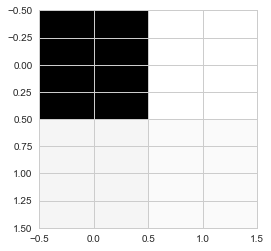

In [34]:
print(confusion_matrix)
plt.imshow(confusion_matrix, cmap='binary')

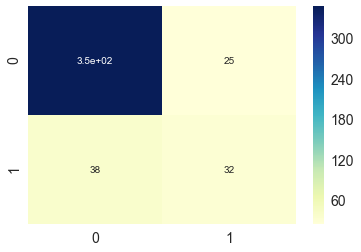

In [35]:
df_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
#plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10}, cmap= "YlGnBu")# font size

# Feature Ranking via the Random Forest

sns.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line

In [36]:
trace = go.Scatter(
y = rf.feature_importances_,
x = attrition_final.columns.values,
mode='markers',
marker=dict(
sizemode = 'diameter',
sizeref = 1,
size = 13,
#size= rf.feature_importances_,
#color = np.random.randn(500), #set color equal to a variable
color = rf.feature_importances_,
colorscale='Portland',
showscale=True
),
text = attrition_final.columns.values
)
data = [trace]
layout= go.Layout(
autosize= True,
title= 'Random Forest Feature Importance',
hovermode= 'closest',
xaxis= dict(
ticklen= 5,
showgrid=False,
zeroline=False,
showline=False
),
yaxis=dict(
title= 'Feature Importance',
showgrid=False,
zeroline=False,
ticklen= 5,
gridwidth= 2
),
showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Visualising Tree Diagram with Graphviz
Let us now visualise how a single decision tree traverses the features in our data as the DecisionTreeClassifier object of sklearn comes
with a very convenient export_graphviz method that exports the tree diagram into a .png format which you can view from the output
of this kernel.

In [37]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

In [38]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
DT=decision_tree.fit(x_train, y_train)
# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)

In [39]:
from sklearn import tree
tree.export_graphviz(DT,out_file='tree.dot')

In [40]:
import os
os.environ["PATH"]+= os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

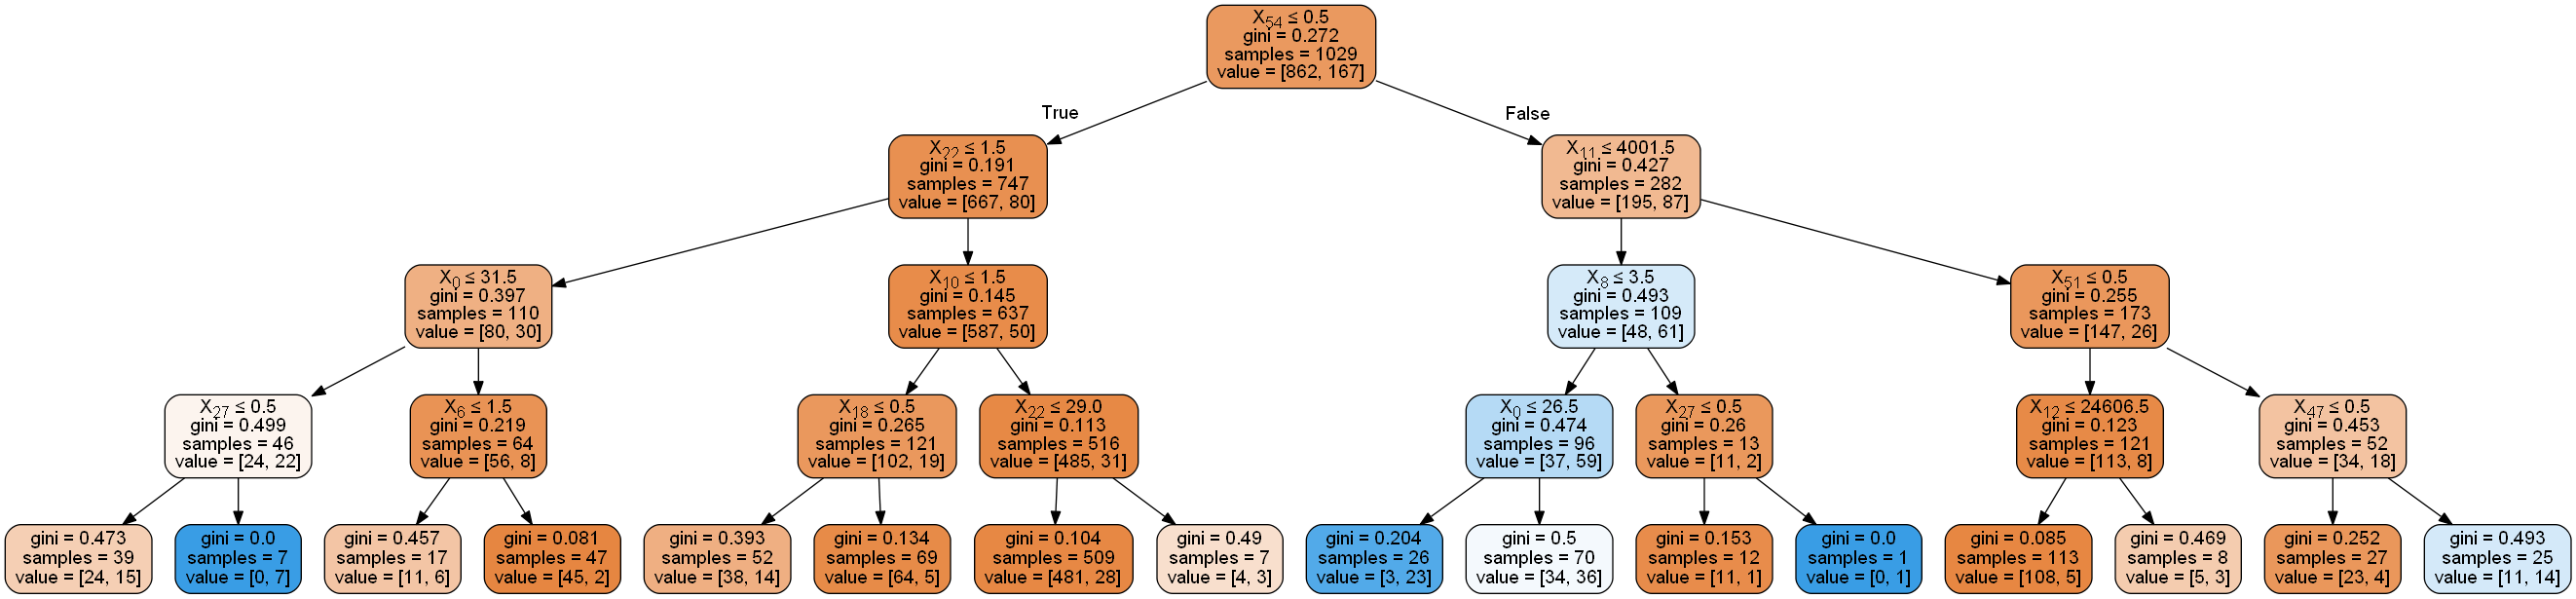

In [41]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

dot_data= StringIO()

export_graphviz(DT, out_file= dot_data, filled= True, rounded=True, special_characters=True)

graph= pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())

# Gradient Boosted Classifier

In [42]:
gb_params ={
'n_estimators': 1500,
'max_features': 0.9,
'learning_rate' : 0.25,
'max_depth': 4,
'min_samples_leaf': 2,
'subsample': 1,
'max_features' : 'sqrt',
'random_state' : seed,
'verbose': 0
}

In [43]:
gb= GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_predictions= gb.predict(x_test)

In [44]:
print(accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

0.8752834467120182
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       371
           1       0.71      0.36      0.48        70

   micro avg       0.88      0.88      0.88       441
   macro avg       0.80      0.67      0.70       441
weighted avg       0.86      0.88      0.86       441



# Feature Ranking via the Gradient Boosting Model

In [45]:
# Scatter plot
trace = go.Scatter(
y = gb.feature_importances_,
x = attrition_final.columns.values,
mode='markers',
marker=dict(
sizemode = 'diameter',
sizeref = 1,
size = 13,
#size= rf.feature_importances_,
#color = np.random.randn(500), #set color equal to a variable
color = gb.feature_importances_,
colorscale='Portland',
showscale=True
),
text = attrition_final.columns.values
)
data = [trace]
layout= go.Layout(
autosize= True,
title= 'Gradient Boosting Model Feature Importance',
hovermode= 'closest',
xaxis= dict(
ticklen= 5,
showgrid=False,
zeroline=False,
showline=False
),
yaxis=dict(
title= 'Feature Importance',
showgrid=False,
zeroline=False,
ticklen= 5,
gridwidth= 2
),
showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

# CONCLUSION
We have constructed a very simple pipeline of predicting employee attrition, from some basic Exploratory Data Analysis to feature
engineering as well as implementing two learning models in the form of a Random Forest and a Gradient Boosting classifier. This
whole notebook takes less than a minute to run and it even returns a 88% accuracy in its predictions.